In [1]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
df = pd.read_csv('../dataset/subtitles_dataset_tokenized.csv')
crew_df = pd.read_csv('../dataset/crew.tsv', sep='\t')

In [3]:
# merge datasets
crew_df['IMDB_ID'] = crew_df.tconst.apply(lambda x: int(x.replace('tt', '')))
df = df.merge(right=crew_df, on='IMDB_ID', how='outer')
#df = df.drop(['directors_x', 'writers_x', 'directors_y', 'writers_y'], axis=1)
df = df.drop('tconst', axis=1)
df = df.replace(r'\N', np.nan)

In [4]:
df.set_index('filename', inplace=True)
df.dropna(inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.drop_duplicates(subset='IMDB_ID', inplace=True)

In [6]:
df['main_genre'] = df.genre.str.split(',').apply(lambda x: x[0])

In [7]:
df.drop_duplicates(subset='IMDB_ID', inplace=True)

In [8]:
df['main_genre'] = df.genre.str.split(',').apply(lambda x: x[0])

## Load imdb persons file

In [9]:
persons_df = pd.read_csv('../dataset/persons.tsv', sep='\t')
persons_df.shape

(10085356, 6)

In [10]:
persons_df.set_index('nconst', inplace=True)

In [11]:
persons_df.head()

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
nconst,,,,,
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0043044,tt0053137"
nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0038355,tt0071877,tt0037382"
nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0059956,tt0049189,tt0054452,tt0057345"
nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0078723,tt0080455"
nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0050976,tt0083922"


In [12]:
persons_df.loc['nm0000001'].primaryName

'Fred Astaire'

## Get only movies with one single writer

In [13]:
f = df[[len(entry) == 1 for entry in df.writers.str.split(',')]]
df.shape

(11304, 10)

# Analyze writers

In [14]:
writers = df.writers.str.split(',')

In [15]:
df.dropna(inplace=True)

In [16]:
from collections import Counter
writers = Counter((writer for entry in writers for writer in entry))

In [17]:
len(writers)

15496

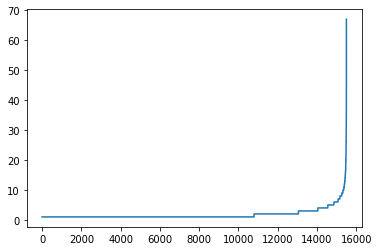

In [27]:
plt.plot(list(sorted(writers.values())))
plt.show()

In [19]:
for writer_id, value in writers.most_common(20):
    print(f'Writer:\n{persons_df.loc[writer_id]} \n\nMovies:  {value}\n\n{"#"*70}')

Writer:
primaryName                                      H.M. Walker
birthYear                                               1878
deathYear                                               1937
primaryProfession                 writer,miscellaneous,actor
knownForTitles       tt0014429,tt0024140,tt0024654,tt0022251
Name: nm0907778, dtype: object 

Movies:  67

######################################################################
Writer:
primaryName                                      Woody Allen
birthYear                                               1935
deathYear                                                 \N
primaryProfession                      writer,director,actor
knownForTitles       tt0079522,tt0097123,tt0118954,tt0075686
Name: nm0000095, dtype: object 

Movies:  39

######################################################################
Writer:
primaryName                                     Stephen King
birthYear                                               1947
deathYear 

In [55]:
#sample = df[(df.writers.str.contains('nm0000095')) | (df.writers.str.contains('nm0000175'))]
sample = df[(df.writers.str.contains('nm0498278'))]

In [56]:
sample.shape

(24, 10)

In [57]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

X = TfidfVectorizer(stop_words=get_stop_words('de')).fit_transform(sample.text)

pca = PCA(n_components=2)

Xr = pca.fit_transform(X.todense())

In [63]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 10)})
plt.figure
p = sns.scatterplot(x=Xr[:, 0], y=Xr[:, 1], data=sample, hue='title')
#p.legend_.remove()

ValueError: Could not interpret input 'title'

In [24]:
df[df.writers == 'nm0001429']

,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,main_genre
filename,,,,,,,,,,
3999839.xml,SHOCHIKU PRÄSENTIERT EINE KOPRODUKTION VON BAN...,98967,"Action,Comedy,Crime",1990.0,Japanese,untokenisiert,96,nm0001429,nm0001429,Action
3658771.xml,Machst du dich endlich an die Arbeit oder was ...,103704,"Comedy,Drama,Romance",1991.0,Japanese,untokenisiert,101,nm0001429,nm0001429,Comedy
3869352.xml,Untertitel astrogirl @ eselkult.de Sie können ...,108188,"Action,Comedy,Crime",1993.0,Japanese,untokenisiert,94,nm0001429,nm0001429,Action
4510095.xml,"POLIZEIREVIER MIAMI - Hey , das ist der falsch...",110524,Comedy,1994.0,Japanese,untokenisiert,108,nm0001429,nm0001429,Comedy
4534156.xml,- Ihr habt 10 Minuten auf der Bühne . - Gut . ...,116767,"Crime,Drama,Sport",1996.0,Japanese,untokenisiert,107,nm0001429,nm0001429,Crime
3863123.xml,"BANDAI VISUAL , TV TOKYO , TOKYO FM and OFFICE...",119250,"Crime,Drama,Romance",1997.0,Japanese,untokenisiert,103,nm0001429,nm0001429,Crime
3658458.xml,Filmverleih JAPAN HERALD OFFICE KITANO BANDAI ...,199683,"Comedy,Drama",1999.0,Japanese,untokenisiert,121,nm0001429,nm0001429,Comedy
113281.xml,"Er meinte , er kündigt ! Warten Sie ! Yamamoto...",222851,"Crime,Drama,Thriller",2000.0,"English, Japanese, Italian, Spanish",untokenisiert,114,nm0001429,nm0001429,Crime
4524709.xml,"Präsentiert von BANDAI VISUAL , TOKYO FM TV TO...",330229,"Drama,Romance",2002.0,Japanese,untokenisiert,114,nm0001429,nm0001429,Drama
